In [ ]:
import xml.etree.ElementTree as ET
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf

In [ ]:
def xml_annotations_Fight(xml_paths):
    tree=ET.parse(xml_paths)
    root=tree.getroot()
    annotations=[]
    for elements in root.findall('object'):
        class_n=elements.find('name').text
        bbox=elements.find('bndbox')
        xmin=int(bbox.find('xmin').text)
        ymin=int(bbox.find('ymin').text)
        xmax=int(bbox.find('xmax').text)
        ymax=int(bbox.find('ymax').text)
        if class_n=='Fight' or class_n=='fight':
            class_n=0
        List=[class_n,xmin,ymin,xmax,ymax]
        del List[0]
        for i in List:
            if i!=0:
              annotations.append(int(i))
    return annotations

In [ ]:
new_size = (300, 300)

def resize_image_change_coordinate(img_path, annotation):
    img = cv2.imread(img_path)
    resize_img = cv2.resize(img, new_size,interpolation=cv2.INTER_CUBIC)
    resized_annotations = []
    coordinates=annotation
    new_xmin = int(int(coordinates[0]) * new_size[0] / img.shape[1])
    new_ymin = int(int(coordinates[1]) * new_size[1] / img.shape[0])
    new_xmax = int(int(coordinates[2]) * new_size[0] / img.shape[1])
    new_ymax = int(int(coordinates[3]) * new_size[1] / img.shape[0])
    resized_annotations.append(new_xmin)
    resized_annotations.append(new_ymin)
    resized_annotations.append(new_xmax)
    resized_annotations.append(new_ymax)
    resize_img=np.array(resize_img)
    resize_img=resize_img/255
    return resize_img, resized_annotations

In [ ]:
def visualize(a,b,c='Fight'):
    xmin = b[0]
    ymin = b[1]
    xmax = b[2]
    ymax = b[3]

    color = (0, 255, 0)
    thickness = 3
    class_name_str = str(c)  # Convert class_name to string
    cv2.rectangle(a, (xmin, ymin), (xmax, ymax), color, thickness)
    cv2.putText(a, class_name_str, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.2, color, thickness, cv2.LINE_AA)

    plt.imshow(a)
    plt.show()

In [ ]:
import cv2
import matplotlib.pyplot as plt

def visualize(image, bounding_box, class_name='Fight', text_size=0.5, box_color=(255, 0,0)):
    xmin, ymin, xmax, ymax = bounding_box

    # Increase text size
    font_size = 0.7
    thickness = 2

    color = box_color
    class_name_str = str(class_name)

    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, thickness)
    cv2.putText(image, class_name_str, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, font_size, color, thickness, cv2.LINE_AA)

    plt.imshow(image)
    plt.show()

# Example usage:
# image = your_image
# bounding_box = (xmin, ymin, xmax, ymax)
# visualize(image, bounding_box, class_name='Fight', text_size=0.7, box_color=(0, 0, 255))


In [ ]:
a_path=[path for path in os.listdir('/content/drive/MyDrive/Fight Detection/xml_Annotations')]
i_path=[path for path in os.listdir('/content/drive/MyDrive/Fight Detection/Fight')]

In [ ]:
a_path.sort()
i_path.sort()

In [ ]:
annotations=[]
for i in a_path:
    temp=xml_annotations_Fight('/content/drive/MyDrive/Fight Detection/xml_Annotations/'+i)
    annotations.append(temp)

In [ ]:
annotations[600]

[211, 84, 436, 296]

In [ ]:
a_path[44],i_path[44]

('V_1.mp4_frame0.xml', 'GettyImages-1479128494-e1680627560527.jpg')

In [ ]:
del i_path[44]

In [ ]:
a_path[600],i_path[600]

('V_92.mp4_frame3.xml', 'V_92.mp4_frame3.jpg')

In [ ]:
resized_image=[]
resized_annotations=[]
for a,b in zip(annotations, i_path):
    path='/content/drive/MyDrive/Fight Detection/Fight/'+b
    x,y=resize_image_change_coordinate(path,a)
    resized_image.append(x)
    resized_annotations.append(y)

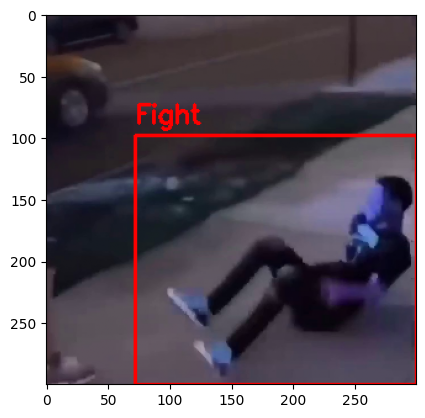

In [ ]:
visualize(resized_image[250],resized_annotations[250])

In [ ]:
INCP_model = tf.keras.applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(300, 300, 3))


87910968/87910968 [==============================] - 3s 0us/step


In [ ]:
for layer in INCP_model.layers:
    layer.trainable = False

In [ ]:
model=tf.keras.Sequential()

In [ ]:
model.add(INCP_model)

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer=tf.keras.initializers.Orthogonal()))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(2,2),activation='relu',padding='same',kernel_initializer=tf.keras.initializers.Orthogonal()))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation='relu',padding='same',kernel_initializer=tf.keras.initializers.Orthogonal()))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [ ]:
model.add(tf.keras.layers.UpSampling2D(size=(2, 2)))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=512,kernel_size=(3,3),activation='relu',padding='same',kernel_initializer=tf.keras.initializers.Orthogonal()))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(2,2),activation='relu',padding='same',kernel_initializer=tf.keras.initializers.Orthogonal()))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation='relu',padding='same',kernel_initializer=tf.keras.initializers.Orthogonal()))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

In [ ]:
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(filters=256,kernel_size=(2,2),activation='relu',padding='same'))
model.add(tf.keras.layers.Conv2D(filters=128,kernel_size=(2,2),activation='relu',padding='same'))

In [ ]:
model.add(tf.keras.layers.ActivityRegularization(l2=0.02))

In [ ]:
model.add(tf.keras.layers.Flatten())

In [ ]:
model.add(tf.keras.layers.Reshape((1, -1)))

In [ ]:
model.add(tf.keras.layers.LSTM(units=100, activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
model.add(tf.keras.layers.Dense(units=4,activation='linear'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 8, 8, 2048)        21802784  
                                                                 
 conv2d_103 (Conv2D)         (None, 8, 8, 512)         9437696   
                                                                 
 conv2d_104 (Conv2D)         (None, 8, 8, 256)         524544    
                                                                 
 conv2d_105 (Conv2D)         (None, 8, 8, 128)         131200    
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 4, 4, 128)         0         
 g2D)                                                            
                                                                 
 up_sampling2d_1 (UpSamplin  (None, 8, 8, 128)         0         
 g2D)                                                 

In [ ]:
earlystopping=tf.keras.callbacks.EarlyStopping(patience=3,monitor='val_loss')

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.Huber(delta=1.0),metrics=['accuracy'])


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(resized_image,resized_annotations,test_size=0.2,shuffle=True,random_state=42)

In [ ]:
x_train=np.array(x_train)
x_test=np.array(x_test)
y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,callbacks=[earlystopping],batch_size=32)

Epoch 1/50
17/17 [==============================] - 26s 641ms/step - loss: 148.0781 - accuracy: 0.2114 - val_loss: 147.5700 - val_accuracy: 0.0000e+00
Epoch 2/50
17/17 [==============================] - 3s 203ms/step - loss: 114.7940 - accuracy: 0.3493 - val_loss: 81.9977 - val_accuracy: 0.6471
Epoch 3/50
17/17 [==============================] - 3s 208ms/step - loss: 61.0524 - accuracy: 0.6158 - val_loss: 59.7471 - val_accuracy: 0.6471
Epoch 4/50
17/17 [==============================] - 4s 215ms/step - loss: 47.1073 - accuracy: 0.6158 - val_loss: 54.1163 - val_accuracy: 0.6471
Epoch 5/50
17/17 [==============================] - 3s 204ms/step - loss: 44.2228 - accuracy: 0.6158 - val_loss: 45.3244 - val_accuracy: 0.6471
Epoch 6/50
17/17 [==============================] - 3s 207ms/step - loss: 38.5550 - accuracy: 0.6158 - val_loss: 38.3607 - val_accuracy: 0.6471
Epoch 7/50
17/17 [==============================] - 4s 213ms/step - loss: 36.1913 - accuracy: 0.6158 - val_loss: 43.0976 - val_a

In [ ]:
y_pred=model.predict(x_test)

5/5 [==============================] - 2s 140ms/step


In [ ]:
def Predict(x,y):
  temp=[]
  for p in y:
    temp.append(int(p))
  visualize(x,temp)

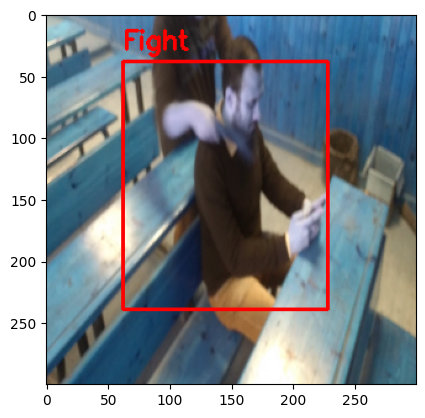

In [ ]:
Predict(x_test[25],y_pred[25])

In [ ]:
y_pred_train=model.predict(x_train)

17/17 [==============================] - 2s 134ms/step


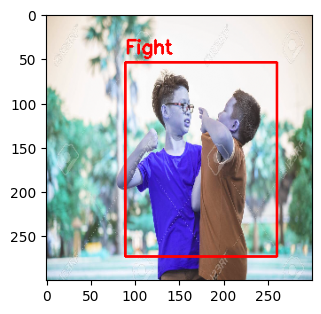

<ipython-input-53-82eefebf5af2>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(5,2,i+1)


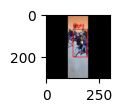

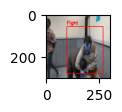

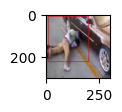

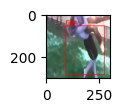

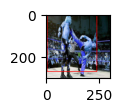

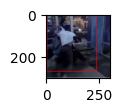

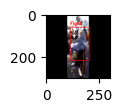

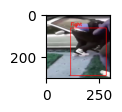

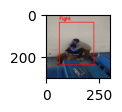

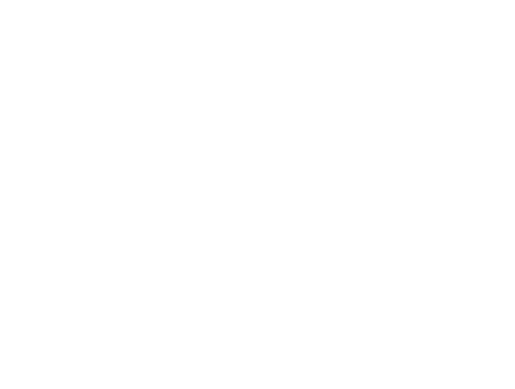

In [ ]:
import matplotlib.pyplot as plt
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Your code here

def show_25_images(images,labels):
  plt.figure(figsize=(20,20))
  for i in range(10):
    ax=plt.subplot(5,2,i+1)
    Predict(images[i+40],labels[i+40])
    plt.axis('off')
show_25_images(x_train,y_pred_train)

In [ ]:
x_train.shape

(544, 300, 300, 3)

In [ ]:
def custom_video(path):
  paths=[p for p in os.listdir(path)]
  image_path=[]
  for p in paths:
    temp='/content/drive/MyDrive/Fight Detection/Test/'+p
    image_path.append(temp)
  images=[]
  for p in image_path:
    img=cv2.imread(p)
    img=cv2.resize(img,(300,300),interpolation=cv2.INTER_CUBIC)
    img=img/255
    images.append(img)
  images=np.array(images)
  y_pred_1=model.predict(images)
  return images,y_pred_1


In [ ]:
a,b=custom_video('/content/drive/MyDrive/Fight Detection/Test')

1/1 [==============================] - 4s 4s/step


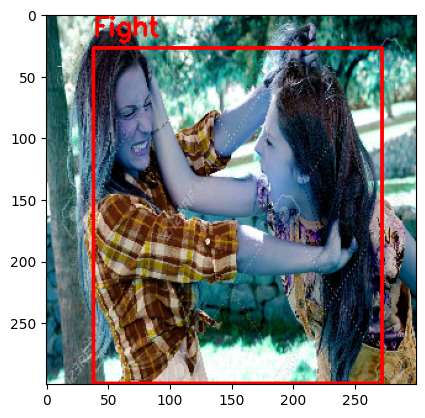

In [ ]:
Predict(a[10],b[10])

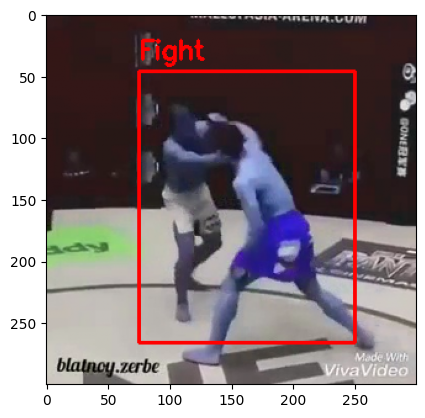

In [ ]:
Predict(a[5],b[5])

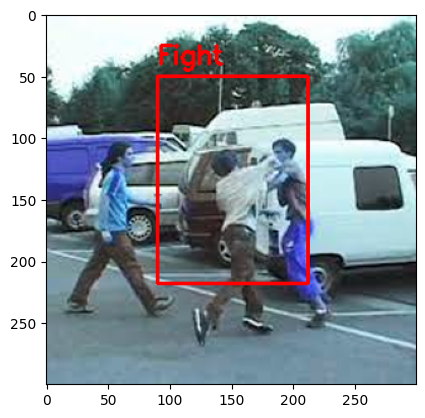

In [ ]:
Predict(a[11],b[11])

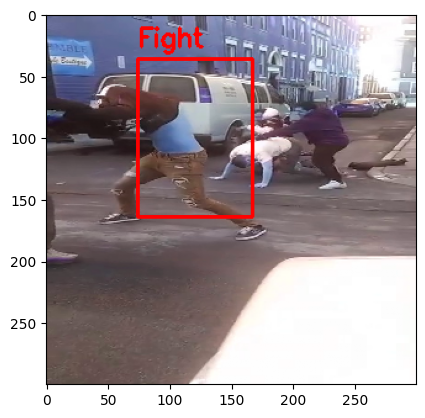

In [ ]:
Predict(a[12],b[12])

In [ ]:
model.save('/content/drive/MyDrive/Fight Detection/Fight_Model_1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:

import cv2
import matplotlib.pyplot as plt
import numpy as np

def Predict(path):
    image=cv2.imread(path)
    image = cv2.resize(frame, (300, 300), interpolation=cv2.INTER_CUBIC)
    image = np.expand_dims(image, axis=0)
    y_pred = model.predict(image)
    return y_pred

def Find(path):
    a = Predict(path)
    frame=cv2.imread(path)
    img = cv2.resize(frame, (300, 300))
    img = img / 255
    if int(a[0][0]):
        image = np.expand_dims(img, axis=0)
        annotations = loaded_model.predict(image)
        visualize(img, annotations[0])
    else:
        plt.imshow(img)
        plt.title('No Fight Detected')

def visualize(image, bounding_box, class_name='Fight', text_size=0.5, box_color=(255, 0, 0)):
    xmin, ymin, xmax, ymax = map(int, bounding_box)

    # Increase text size
    font_size = 0.7
    thickness = 2

    color = box_color
    class_name_str = str(class_name)

    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, thickness)
    cv2.putText(image, class_name_str, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, font_size, color, thickness,
                cv2.LINE_AA)

    plt.imshow(image)
    plt.title('Fight Detected')
    plt.show()

In [ ]:
model=tf.keras.models.load_model('/content/drive/MyDrive/Fight Detection/fc_1.h5')

In [ ]:
loaded_model=tf.keras.load_model('/content/drive/MyDrive/Fight Detection/Fight_Model_1.h5')

AttributeError: module 'keras.api._v2.keras' has no attribute 'load_model'

1/1 [==============================] - 0s 274ms/step


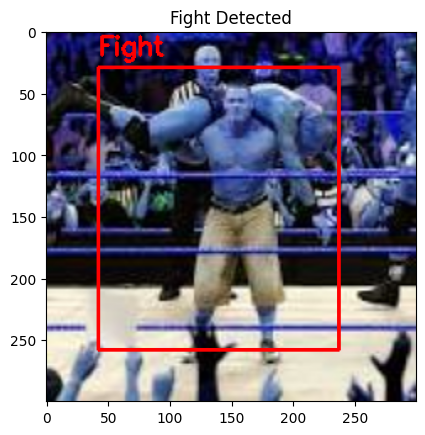